## <center>Домашнее задание 7. Визуализация многомерных данных в 2D, поиск выбросов и кластеризация</center>

In [32]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import sys
if sys.version_info.major == 2:
    from urllib import urlopen
if sys.version_info.major == 3:    
    from urllib.request import urlopen

from sklearn.preprocessing import scale

Populating the interactive namespace from numpy and matplotlib


**Загружаем датасет Breaset Canser Wisconsin. Метки классов нужны только для оценки качества кластеризации.**

In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/"
raw_data = urlopen(url + "wdbc.data")
data = np.loadtxt(raw_data, delimiter=",", converters = {1: lambda x: int(x == b'M')})
X = data[:, 2:]
y = data[:, 1]

shape(X), shape(y)

((569L, 30L), (569L,))

**Визуализируйте данные в 2D-проекции, используя PCA.**

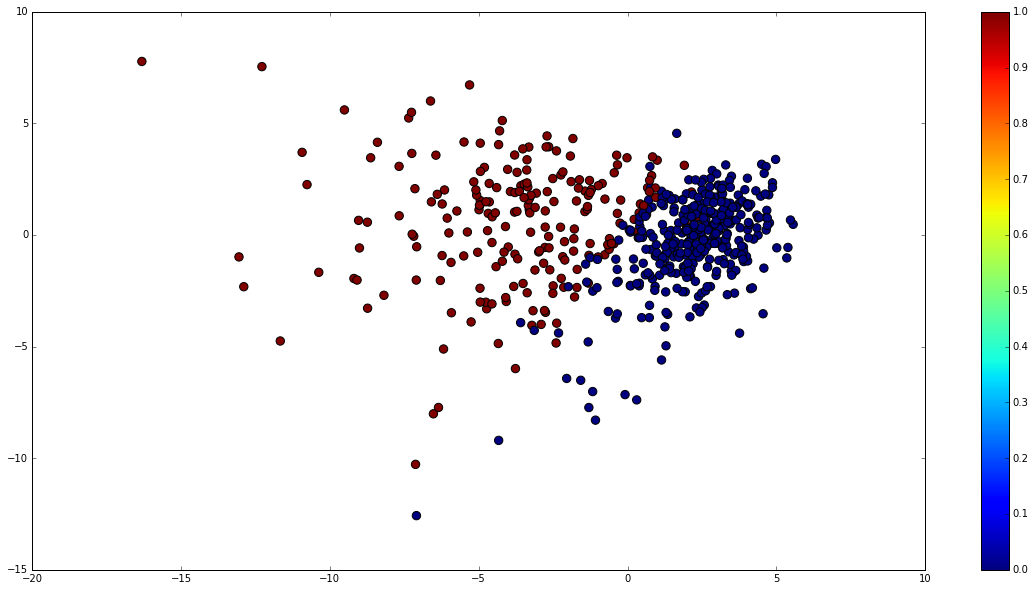

In [34]:
from sklearn.decomposition import PCA

# Apply PCA to X with n_components=2
X_scaled = scale(X) 
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


# Plot X in 2D-projection
plt.figure(figsize=(20,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70)
plt.colorbar()
plt.show()

**Примените OneClassSVM для поиска выбросов и отобразите выбросы в 2D-проекции. После этого удалите выбросы из выборки (долю выбросов выберите сами). Все ли найденные выбросы выглядят как выбросы в 2D-проекции?**

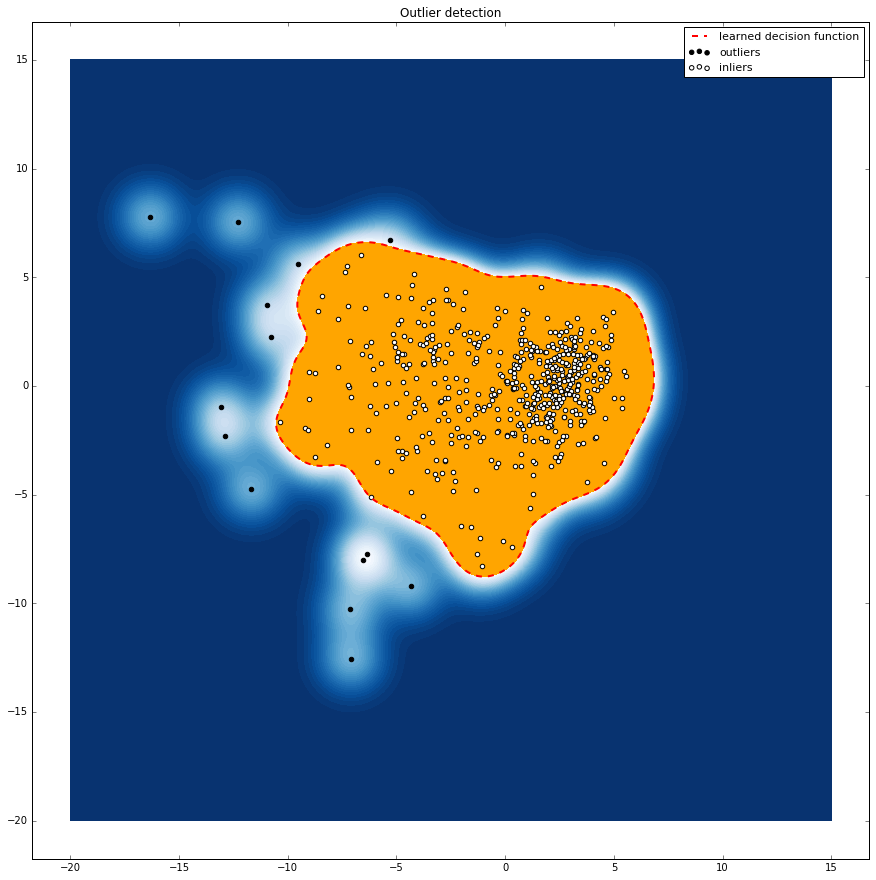

In [4]:
from sklearn.svm import OneClassSVM
from scipy.stats import scoreatpercentile

OUT_FRAC = 0.024

# Fit one-class SVM
ocsvm = OneClassSVM(kernel="rbf")
ocsvm.fit(X_reduced)

# Detect outliers
dist_to_border = ocsvm.decision_function(X_reduced).ravel()
threshold = scoreatpercentile(dist_to_border, 100 * OUT_FRAC)
is_outlier = dist_to_border < threshold
not_outlier = dist_to_border > threshold

# Plot outliers in 2D-projection
X_num = X.shape[0]
xx, yy = np.meshgrid(np.linspace(-20, 15, 500), np.linspace(-20, 15, 500))

n_inliers = int((1. - OUT_FRAC) * X_num)
n_outliers = int(OUT_FRAC * X_num)

Z = ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,15))
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 40), cmap=plt.cm.Blues_r)

a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')

b = plt.scatter(X_reduced[is_outlier, 0], X_reduced[is_outlier, 1], c='black')
c = plt.scatter(X_reduced[is_outlier == 0, 0], X_reduced[is_outlier == 0, 1], c='white')

plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))

In [5]:
# Remove outliers from X
X = X[not_outlier]

**Попробуйте использовать различные алгоритмы кластеризации (хотя бы 2) на этом наборе данных (после удаления выбросов). Визуализируйте результаты в проекции на первые две главных компоненты.**

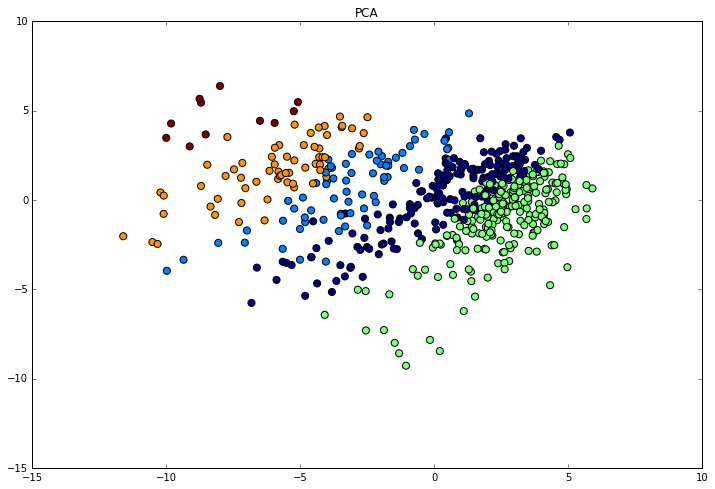

In [6]:
from sklearn.cluster import KMeans

# Fit clustering algorithms to X
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)

# Visualizing using PCA
X_scaled = scale(X) 
pca = PCA(n_components=2)
res = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50)
plt.title('PCA')

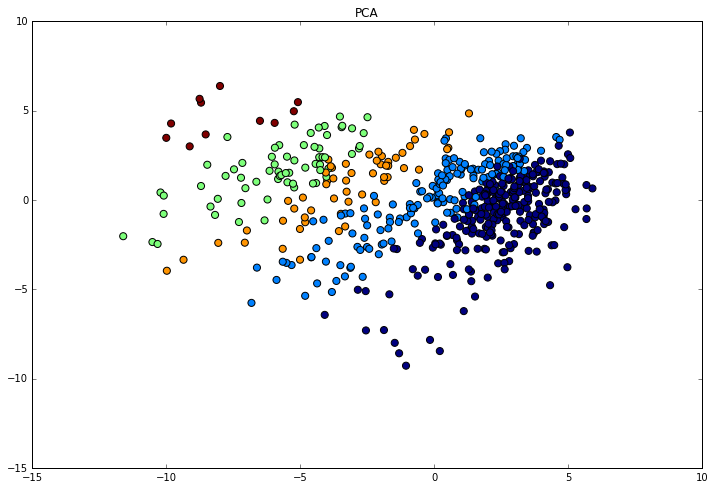

In [15]:
# Import several clustering algorithms
from sklearn.cluster import AgglomerativeClustering


# Fit clustering algorithms to X
AggC = AgglomerativeClustering(n_clusters=5)
AggC.fit(X)

# Visualizing using PCA
X_scaled = scale(X) 
pca = PCA(n_components=2)
res = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=AggC.labels_, s=50)
plt.title('PCA')

In [39]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
model.fit_transform(X)

array([[ 13.8603996 ,  21.0308802 ],
       [ 11.39994343,  21.00637956],
       [  6.30627145,  21.93863008],
       ..., 
       [ -3.87809937,   9.89179894],
       [ 10.80214733,  22.12872253],
       [-10.80933409,  26.00166496]])

In [40]:
X_Train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X)

#some convert lists of lists to 2 dataframes (df_train_neg, df_train_pos) depending on the label - 

#plot the negative points and positive points
scatter(df_train_neg.val1, df_train_neg.val2, marker='o', c='red')
scatter(df_train_pos.val1, df_train_pos.val2, marker='x', c='green')

AttributeError: 'TSNE' object has no attribute 'shape'

**Для каждого из алгоритмов вычислите метрики качества кластеризации: ARI, AMI, гомогенность, полноту и силуэт. Эти показатели не зависят от самих значений меток, поэтому можно не заботиться о том, какой кластер какому классу соответствует. Сравните полученные результаты. Какой алгоритм сработал лучше на этом наборе данных?**

In [ ]:
from sklearn import metrics

print('ARI: {0}'.format(metrics.adjusted_rand_score(y_new, y_pred[i])))
print('ARI: {0}'.format(metrics.adjusted_mutual_info_score(y_new, y_pred[i])))
print('Гомогенность: {0}'.format(metrics.homogeneity_score(y_new, y_pred[i])))
print('Полнота: {0}'.format(metrics.completeness_score(y_new, y_pred[i])))
print('Силуэт: {0}'.format(metrics.silhouette_score(X_new, y_pred[i])))
